# Dados de Vacinação - SUS

Esse projeto de Data Analytics tem como objetivo a coleta de dados, a limpeza dos dados e a exploração dos dados de vacinação divulgados pelo 'Open Data SUS' no link https://opendatasus.saude.gov.br/.

## Dicionário de Dados

In [ ]:
'''
document_id: identificador do documento
paciente_id: identificador do vacinado
paciente_idade: idade do vacinado
paciente_dataNascimento: Data de nascimento do vacinado
paciente_enumSexoBiologico: sexo do vacinado (M - Masculino; F - Feminino)
paciente_racaCor_codigo: código da raça/cor do vacinado (1; 2; 3; 4; 99)
paciente_racaCor_valor: descrição da raça/cor do vacinado (1 - Branca; 2 - Preta; 3 - Parda; 4 - Amarela; 99 - Sem informação)
paciente_endereco_coIbgeMunicipio: código IBGE do município de endereço do vacinado
paciente_endereco_coPais: código do país de endereço do vacinado
paciente_endereco_nmMunicipio: nome do município de endereço do vacinado
paciente_endereco_nmPais: nome do país de endereço do vacinado
paciente_endereco_uf: sigla da UF de endereço do vacinado
paciente_endereco_cep: 5 dígitos para anonimizado e 7 dígitos para identificado
paciente_nacionalidade_enumNacionalidade: Nacionalidade do vacinado
estabelecimento_valor: código do CNES do estabelecimento que realizou a vacinação
estabelecimento_razaosocial: nome/razão social do estabelecimento
estabelecimento_noFantasia: nome fantasia do estabelecimento
estabelecimento_municipio_codigo: código do município do estabelecimento
estabelecimento_municipio_nome: nome do município do estabelecimento
estabelecimento_uf: sigla da UF do estabelecimento
vacina_grupo_atendimento_code: código do grupo de atendimento ao qual pertence o vacinado
vacina_grupo_atendimento_nome: nome do grupo de atendimento ao qual pertence o vacinado
vacina_categoria_code: código da categoria
vacina_categoria_nome: descrição da categoria
vacina_lote: número do lote da vacina
vacina_fabricante_nome: nome do fabricante/fornecedor
vacina_fabricante_referencia: CNPJ do fabricante/fornecedor
vacina_dataAplicacao: data de aplicação da vacina
vacina_descricao_dose: descrição da dose
vacina_codigo: código da vacina
vacina_nome: nome da vacina/produto
sistema origem: nome do sistema de origem
'''

# Análise Exploratória de Dados

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

Estimativa da população segundo IBGE no link - 'https://sidra.ibge.gov.br/tabela/6579' para determinar estado de estudo.

In [9]:
populacao = pd.read_csv('populacao_estados_ibge.csv', sep=';')
populacao.rename(columns={'Cód' : 'Cod','Brasil e Unidade da Federação' : 'Estado', '2021' : 'Populacao'}, inplace=True)
populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Cód.       28 non-null     int64 
 1   Estado     28 non-null     object
 2   Populacao  28 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 800.0+ bytes


In [12]:
populacao.head()

,Cód.,Estado,Populacao
0,1,Brasil,213317639
1,11,Rondônia,1815278
2,12,Acre,906876
3,13,Amazonas,4269995
4,14,Roraima,652713


<AxesSubplot:xlabel='Estado'>

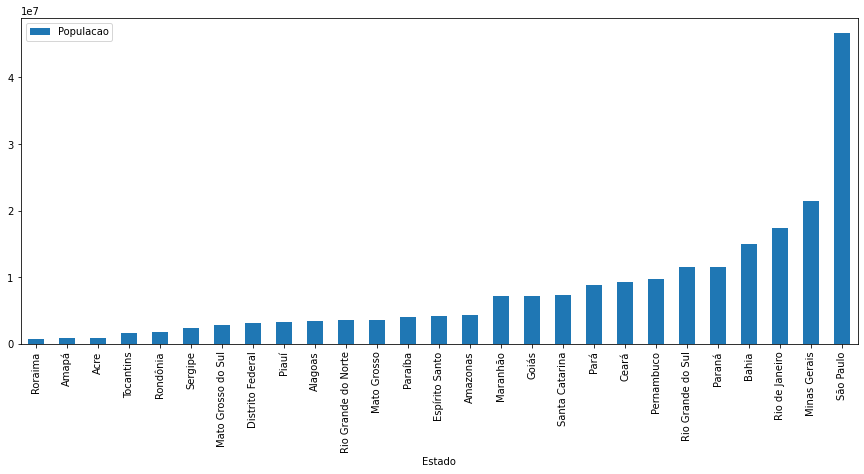

In [8]:
populacao[populacao['Estado'] != 'Brasil'].sort_values('Populacao').plot(kind='bar', x='Estado', y='Populacao', figsize = (15,6))

In [6]:
populacao[populacao['Estado'] == 'Roraima']

,Cód.,Estado,Populacao
4,14,Roraima,652713


Escolhi o estado de Roraima por possuir a menor população e provavelmente o menor dataset no portal do Open Data SUS.

In [17]:
dados = pd.read_csv(
    'https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIPNI/COVID/uf/uf%3DRO/part-00000-d671a0e6-ea40-4d70-a446-746d5c264649.c000.csv',
    nrows = 20,
    sep = ';')

In [18]:
dados.head()

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
0,90551f8e-bf3e-4748-a5af-ced3a57287ec-i0b0,3c0d641bbdbd935cb058817013ac3c5c6df223606dbc4a...,49,1972-04-06,M,4,AMARELA,110040,10,ALTO PARAISO,...,2.0,Faixa Etária,219VCD267Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-10-22,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
1,2f5be6a6-bf85-4096-aeba-af0705113604-i0b0,d287f967c7037ff6c66e7f94ddfd40dbe2b0a04a309cb3...,9,2012-07-26,M,99,SEM INFORMACAO,110004,10,CACOAL,...,NaN,NaN,FN5988,PFIZER - PEDI?TRICA,28290,2022-04-04,1ª Dose,99,COVID-19 PEDIÁTRICA - PFIZER COMIRNATY,Novo PNI
2,90b1d1c4-3377-4723-8d5d-7f3c8101225e-i0b0,d891f40a5cf2274c6164ac88c6362ed732b87fad62c839...,53,1967-11-11,F,1,BRANCA,110025,10,PRESIDENTE MEDICI,...,2.0,Faixa Etária,FF5110,PFIZER,Organization/00394544000851,2021-09-20,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
3,2f7775f2-52fd-4988-93a4-de7bc2e07ccf-i0b0,ea473782e65ca3d2e98686996f5879bf06131a963ab952...,29,1992-06-26,F,3,PARDA,110015,10,OURO PRETO DO OESTE,...,2.0,Faixa Etária,FD7209,PFIZER,Organization/00394544000851,2021-08-10,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
4,90cd211d-5433-4db4-ade7-42487dd2243f-i0b0,fa4c473ece65de70530a9402dc14d5dd99ee55598d722e...,65,1955-08-09,F,1,BRANCA,110004,10,CACOAL,...,2.0,Faixa Etária,210040,SINOVAC/BUTANTAN,Organization/61189445000156,2021-04-09,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI


In [24]:
dados.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem'],
      dtype='object')

## Escolha das colunas para construção da função de importação dos dados

### Pacientes

In [34]:
dados[[
    'paciente_id', 'paciente_idade',
    'paciente_dataNascimento', 'paciente_enumSexoBiologico',
    'paciente_racaCor_codigo', 'paciente_racaCor_valor',
    'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
    'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
    'paciente_endereco_uf', 'paciente_endereco_cep',
    'paciente_nacionalidade_enumNacionalidade'
]].head()

,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade
0,3c0d641bbdbd935cb058817013ac3c5c6df223606dbc4a...,49,1972-04-06,M,4,AMARELA,110040,10,ALTO PARAISO,BRASIL,RO,76862.0,B
1,d287f967c7037ff6c66e7f94ddfd40dbe2b0a04a309cb3...,9,2012-07-26,M,99,SEM INFORMACAO,110004,10,CACOAL,BRASIL,RO,76960.0,B
2,d891f40a5cf2274c6164ac88c6362ed732b87fad62c839...,53,1967-11-11,F,1,BRANCA,110025,10,PRESIDENTE MEDICI,BRASIL,RO,76916.0,B
3,ea473782e65ca3d2e98686996f5879bf06131a963ab952...,29,1992-06-26,F,3,PARDA,110015,10,OURO PRETO DO OESTE,BRASIL,RO,76920.0,B
4,fa4c473ece65de70530a9402dc14d5dd99ee55598d722e...,65,1955-08-09,F,1,BRANCA,110004,10,CACOAL,BRASIL,RO,76968.0,B


In [39]:
dados.paciente_nacionalidade_enumNacionalidade.unique()

array(['B'], dtype=object)

In [44]:
dados.groupby('paciente_endereco_nmMunicipio').paciente_endereco_cep.count()

paciente_endereco_nmMunicipio
ALTO ALEGRE DOS PARECIS    1
ALTO PARAISO               1
ARIQUEMES                  2
CACOAL                     2
CEREJEIRAS                 1
NOVA MAMORE                1
OURO PRETO DO OESTE        1
PORTO VELHO                2
PRESIDENTE MEDICI          2
SAO FELIPE D'OESTE         1
VILHENA                    3
Name: paciente_endereco_cep, dtype: int64

In [48]:
dados_paciente = dados[[
    'paciente_id', 'paciente_idade',
    'paciente_dataNascimento', 'paciente_enumSexoBiologico',
    'paciente_racaCor_valor', 'paciente_endereco_nmMunicipio'
]]

dados_paciente.head()

,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_valor,paciente_endereco_nmMunicipio
0,3c0d641bbdbd935cb058817013ac3c5c6df223606dbc4a...,49,1972-04-06,M,AMARELA,ALTO PARAISO
1,d287f967c7037ff6c66e7f94ddfd40dbe2b0a04a309cb3...,9,2012-07-26,M,SEM INFORMACAO,CACOAL
2,d891f40a5cf2274c6164ac88c6362ed732b87fad62c839...,53,1967-11-11,F,BRANCA,PRESIDENTE MEDICI
3,ea473782e65ca3d2e98686996f5879bf06131a963ab952...,29,1992-06-26,F,PARDA,OURO PRETO DO OESTE
4,fa4c473ece65de70530a9402dc14d5dd99ee55598d722e...,65,1955-08-09,F,BRANCA,CACOAL


### Vacina

In [36]:
dados[[
    'vacina_grupoAtendimento_codigo',
    'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
    'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
    'vacina_fabricante_referencia', 'vacina_dataAplicacao',
    'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome'
]].head()

,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome
0,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,219VCD267Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-10-22,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
1,207,Pessoas de 5 a 11 anos,NaN,NaN,FN5988,PFIZER - PEDI?TRICA,28290,2022-04-04,1ª Dose,99,COVID-19 PEDIÁTRICA - PFIZER COMIRNATY
2,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,FF5110,PFIZER,Organization/00394544000851,2021-09-20,2ª Dose,87,COVID-19 PFIZER - COMIRNATY
3,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,FD7209,PFIZER,Organization/00394544000851,2021-08-10,1ª Dose,87,COVID-19 PFIZER - COMIRNATY
4,202,Pessoas de 65 a 69 anos,2.0,Faixa Etária,210040,SINOVAC/BUTANTAN,Organization/61189445000156,2021-04-09,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC


In [50]:
dados_vacina = dados[[
    'vacina_grupoAtendimento_nome', 'vacina_categoria_nome', 
    'vacina_fabricante_nome', 'vacina_dataAplicacao',
    'vacina_descricao_dose', 'vacina_nome'
]]

dados_vacina.head()

,vacina_grupoAtendimento_nome,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome
0,Pessoas de 18 a 64 anos,Faixa Etária,ASTRAZENECA/FIOCRUZ,2021-10-22,2ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
1,Pessoas de 5 a 11 anos,NaN,PFIZER - PEDI?TRICA,2022-04-04,1ª Dose,COVID-19 PEDIÁTRICA - PFIZER COMIRNATY
2,Pessoas de 18 a 64 anos,Faixa Etária,PFIZER,2021-09-20,2ª Dose,COVID-19 PFIZER - COMIRNATY
3,Pessoas de 18 a 64 anos,Faixa Etária,PFIZER,2021-08-10,1ª Dose,COVID-19 PFIZER - COMIRNATY
4,Pessoas de 65 a 69 anos,Faixa Etária,SINOVAC/BUTANTAN,2021-04-09,1ª Dose,COVID-19 SINOVAC/BUTANTAN - CORONAVAC


### Estabelecimento

In [38]:
dados[[
    'estabelecimento_valor',
    'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
    'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
    'estabelecimento_uf'
]].head()

,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf
0,2808676,PREFEITURA MUNICIPAL DE ALTO PARAISO,HOSPITAL DE PEQUENO PORTE OSVALDO CRUZ,110040,ALTO PARAISO,RO
1,5184843,PREFEITURA MUNICIPAL DE NOVO HORIZONTE DO OESTE,CENTRO DE SAUDE NOVO HORIZONTE,110050,NOVO HORIZONTE DO OESTE,RO
2,2495414,HOSPITAL MUNICIPAL DE PRESIDENTE MEDICI,HOSPITAL E MATERNIDADE EUFRASIA MARIA DA CONCE...,110025,PRESIDENTE MEDICI,RO
3,2496895,MUNICIPIO DE OURO PRETO DO OESTE,CENTRO DE SAUDE OURO PRETO,110015,OURO PRETO DO OESTE,RO
4,2496046,PREFEITURA MUNICIPAL DE CACOAL,HOSPITAL MUNICIPAL MATERNO INFANTIL CACOAL,110004,CACOAL,RO


In [59]:
dados.groupby('estabelecimento_razaoSocial').estalecimento_noFantasia.nunique()

estabelecimento_razaoSocial
HOSPITAL MUNICIPAL DE PRESIDENTE MEDICI            1
MINISTERIO DA SAUDE                                1
MUNICIPIO DE ALTO ALEGRE DOS PARECIS               1
MUNICIPIO DE CEREJEIRAS                            1
MUNICIPIO DE OURO PRETO DO OESTE                   1
MUNICIPIO DE PORTO VELHO                           1
PREFEITURA DO MUNICIPIO DE PORTO VELHO             1
PREFEITURA MUNICIPAL DE ALTO PARAISO               1
PREFEITURA MUNICIPAL DE ARIQUEMES                  1
PREFEITURA MUNICIPAL DE CACOAL                     1
PREFEITURA MUNICIPAL DE CUJUBIM                    1
PREFEITURA MUNICIPAL DE NOVO HORIZONTE DO OESTE    1
PREFEITURA MUNICIPAL DE VILHENA                    2
SECRETARIA MUNICIPAL DE SAUDE DE NOVA MAMORE       1
UNIDADE BASICA DE SAUDE SAO FELIPE SEDE            1
Name: estalecimento_noFantasia, dtype: int64

In [61]:
dados[dados.estabelecimento_razaoSocial == 'PREFEITURA MUNICIPAL DE VILHENA'][[
    'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
    'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome'
]]

,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome
14,PREFEITURA MUNICIPAL DE VILHENA,UNIDADE BASICA DE SAUDE AFONSO MANSUR DE FRANCA,110030,VILHENA
15,PREFEITURA MUNICIPAL DE VILHENA,UNIDADE BASICA DE SAUDE LEONARDO ALVES DE SOUZA,110030,VILHENA


In [11]:
dados.groupby('vacina_descricao_dose')['paciente_id'].count()

vacina_descricao_dose
1ª Dose                 1123153
1ª Dose Revacinação          92
2ª Dose                  541467
3ª Dose                     157
Dose                      30855
Dose Adicional              349
Reforço                    3341
Name: paciente_id, dtype: int64

In [12]:
dados.vacina_descricao_dose.unique()

array(['1ª\xa0Dose', '2ª\xa0Dose', 'Dose\xa0', 'Dose\xa0Adicional\xa0',
       'Reforço\xa0', '3ª\xa0Dose', '1ª\xa0Dose\xa0Revacinação\xa0'],
      dtype=object)

In [29]:
dados.vacina_descricao_dose = dados.vacina_descricao_dose.apply(lambda x: x.replace('\xa0', ' '))


In [30]:
dados.vacina_descricao_dose.unique()

array(['1ª Dose', '2ª Dose', 'Dose ', 'Dose Adicional ', 'Reforço ',
       '3ª Dose', '1ª Dose Revacinação '], dtype=object)

In [ ]:
print('taxa de vacinados em função da estimativa do IBGE: ' + 
    str(
        (len(dados[(dados.vacina_descricao_dose == '1ª Dose') | 
        (dados.vacina_descricao_dose == '1ª Dose Revacinação')])
        / (populacao[populacao['Estado'] == 'Roraima'].Populacao)))
)

taxa de vacinados em função da estimativa do IBGE: 4    0.0
Name: Populacao, dtype: float64


In [ ]:
dados[(dados.vacina_descricao_dose == '1ª Dose') | 
        (dados.vacina_descricao_dose == '1ª Dose Revacinação')]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
